In [1]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import HGate, RYGate, RXGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Examples of Quantum Galton boards, from level 1 to 4

### 1 level QGB (total pegs: 1)

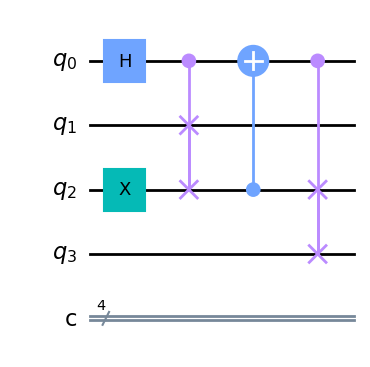

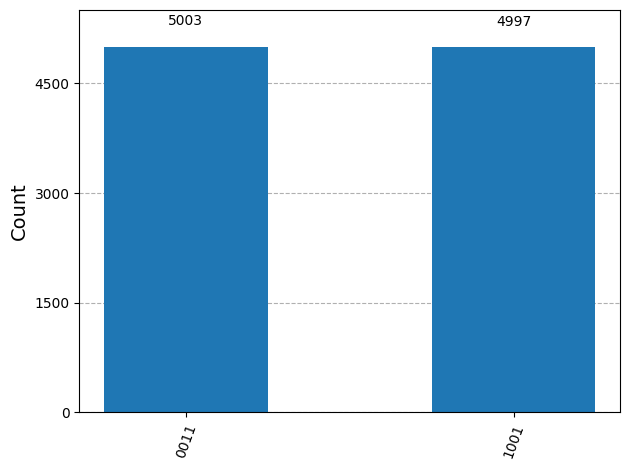

In [6]:
q= QuantumRegister(4, 'q')
c= ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

# Construction of peg. 
qc.h(q[0])
qc.x(q[2]) # The ball
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])

qc.draw(output='mpl', style='clifford') 
plt.show()

for i in range(0, 4):
    qc.measure(q[i], c[i])


backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
# print("Measurement results (bitstrings):")
# for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
#     print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()


### Notice: All the bits in the outcome samples are not different. Only the bits at the $0^{th}$ and $2^{nd}$ position differ. 

### 2 level QGB (total pegs: 3)

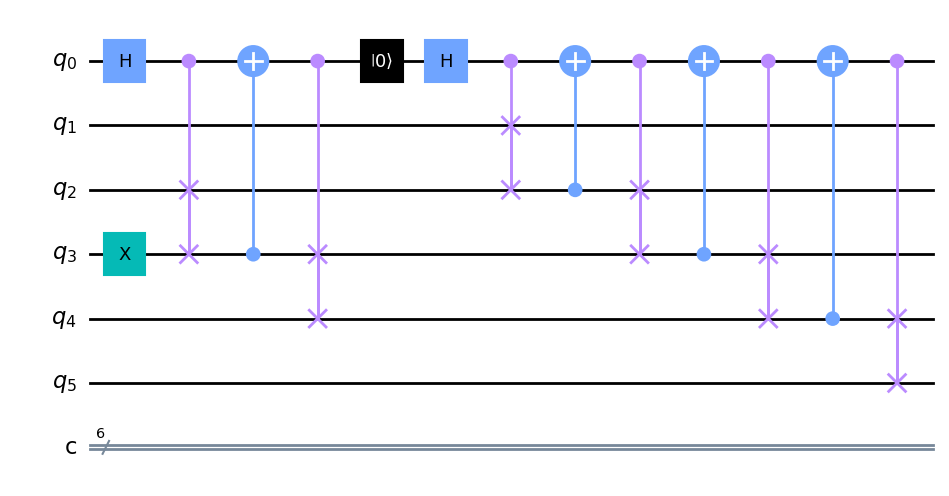

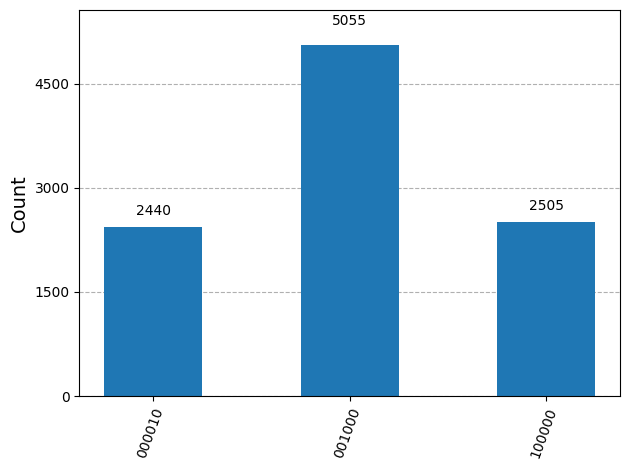

In [7]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(6, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[3])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])

qc.draw(output='mpl', style='clifford') 
plt.show()

for i in range(1, 6):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
# print("Measurement results (bitstrings):")
# for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
#     print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()




### Notice: All the bits in the outcome samples are not different. Only the bits at the $0^{th}$, $2^{nd}$ and $4^{th}$ position differ. 

### 3 level QGB (total pegs: 6)

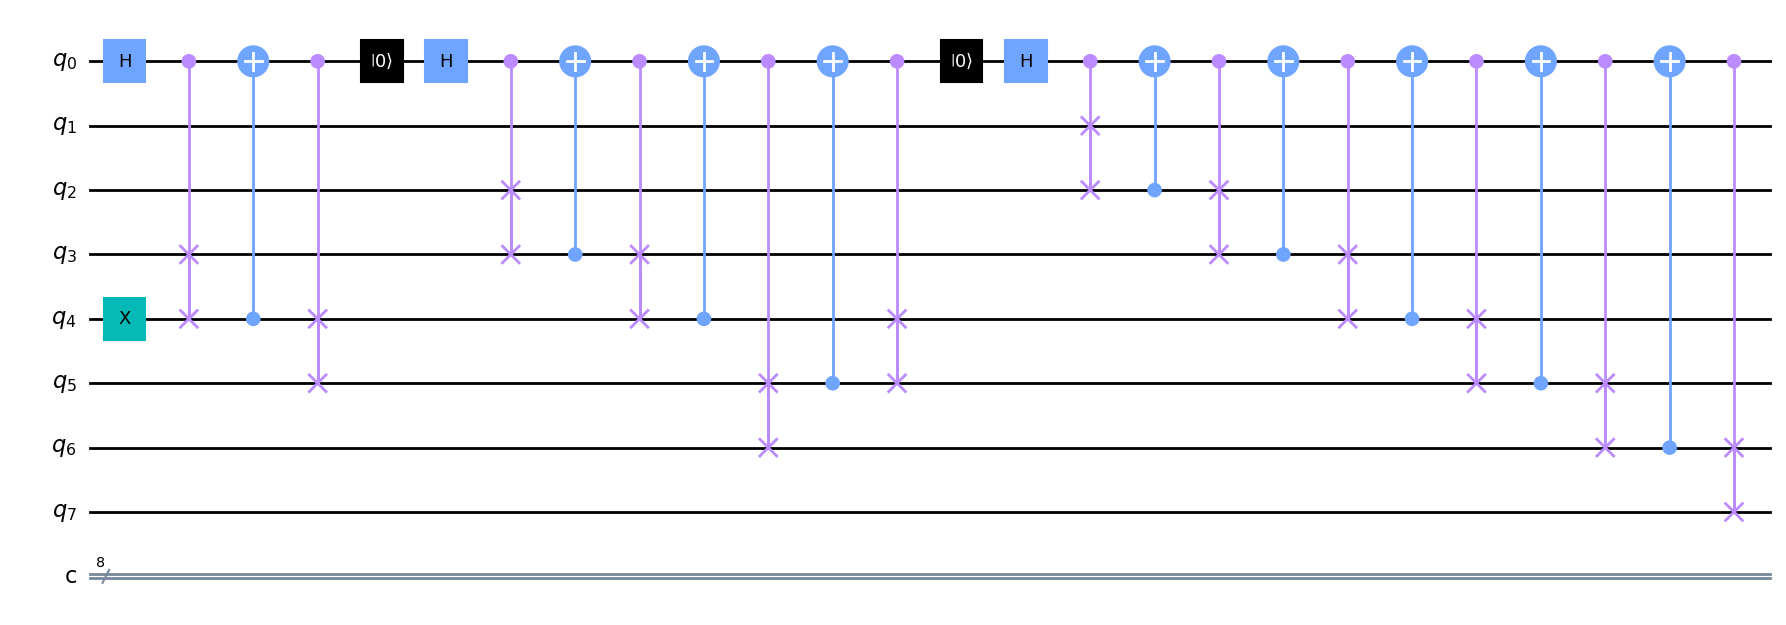

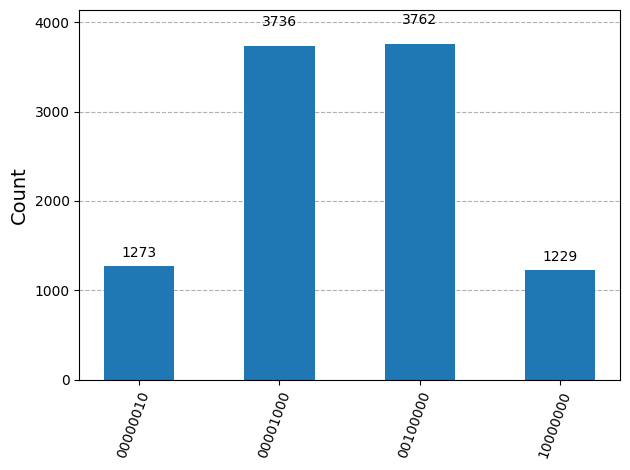

In [8]:
q = QuantumRegister(8, 'q')
c = ClassicalRegister(8, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[4])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[4], q[5])


qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])

qc.draw(output='mpl', style='clifford', fold=-1) 
plt.show()

for i in range(1, 8):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

plot_histogram(counts)
plt.show()


### Notice: Only the bits at the even position differ. 

## 4 level QGB (total pegs: 10)

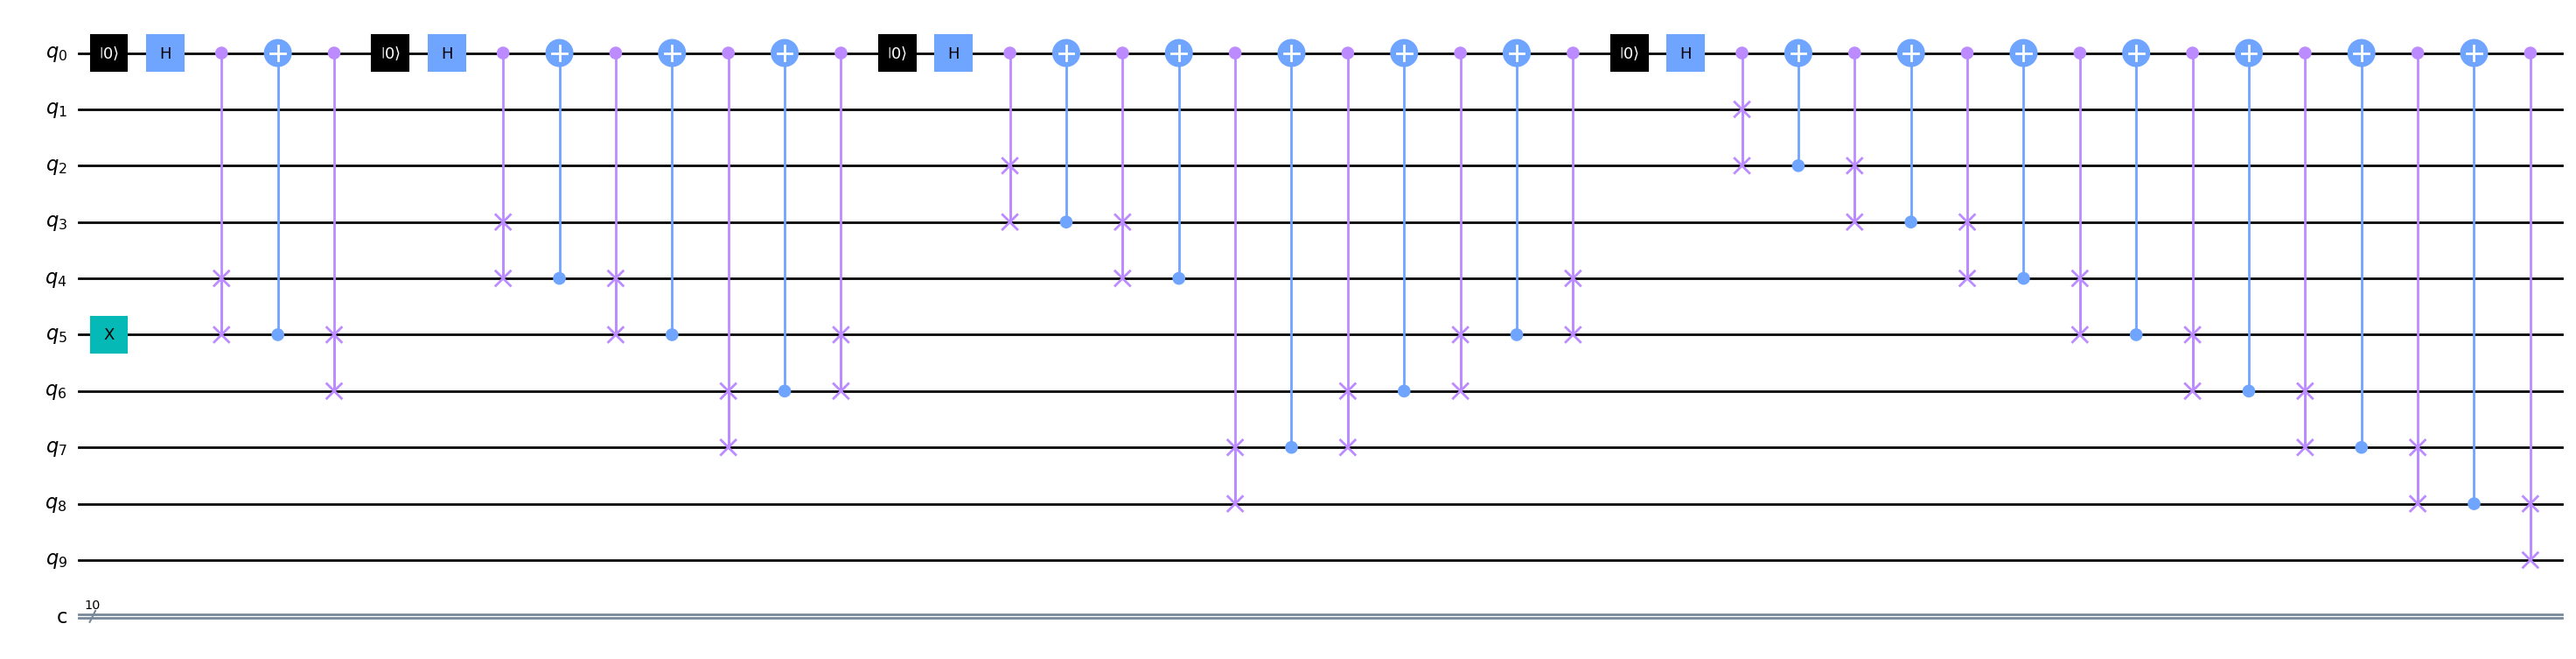

In [10]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
qc = QuantumCircuit(q, c)

qc.reset(q[0])
qc.x(q[5])
qc.h(q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6],q[0])
qc.cswap(q[0],q[5],q[6])
qc.cx(q[5],q[0])
qc.cswap(q[0],q[4],q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])
qc.draw(output='mpl', style='clifford', fold=-1)
plt.show()
for i in range(1, 10):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

### We only keep the bits that differ as outcome labels for the horizontal axis

Even bits extracted from 0010000000: 01000
Even bits extracted from 1000000000: 10000
Even bits extracted from 0000100000: 00100
Even bits extracted from 0000001000: 00010
Even bits extracted from 0000000010: 00001


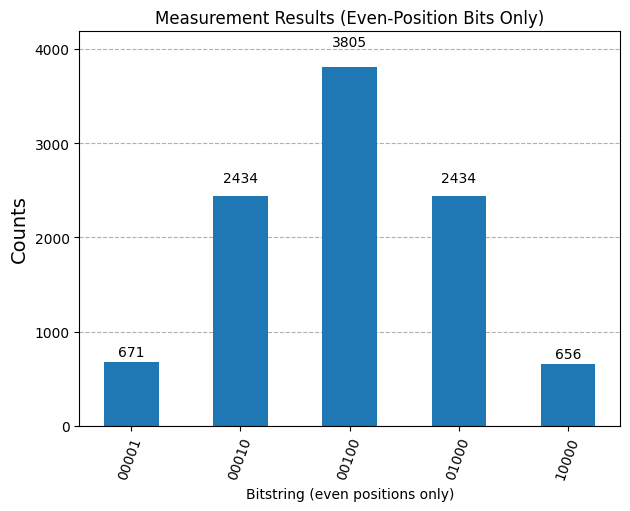

In [11]:
# Function to extract bits at even positions (index 0, 2, 4, ...)
def extract_even_bits(bitstring):
    return ''.join(bitstring[::-1][1::2])[::-1]  # reverse to match Qiskit order, slice, then reverse back

# Create new dictionary with even-position-only bitstrings
even_counts = {}
for bitstring, count in counts.items():
    even_bits = extract_even_bits(bitstring)
    print(f"Even bits extracted from {bitstring}: {even_bits}")
    even_counts[even_bits] = even_counts.get(even_bits, 0) + count

# Plot histogram with simplified labels
plot_histogram(even_counts)
plt.title("Measurement Results (Even-Position Bits Only)")
plt.xlabel("Bitstring (even positions only)")
plt.ylabel("Counts")
plt.show()

## Post processing to obtain the normal distribition

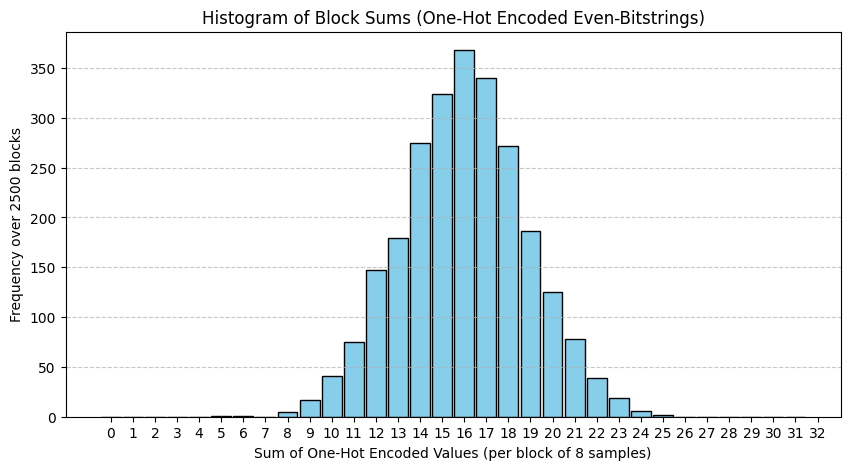

In [12]:
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=20000, memory=True)
memory = job.result().get_memory()  # to get the list of 20000 bitstrings in order of experiments/shots

#bits that are different in the full outcome (even positions only change)
def extract_even_bits(bitstring):
    return ''.join(bitstring[::-1][1::2])[::-1]

even_bitstrings = [extract_even_bits(b) for b in memory]

# one hot encoding of the even bitstrings
unique_even = sorted(set(even_bitstrings))
bitstring_to_int = {b: i for i, b in enumerate(unique_even)}

# one hot encoding to integer labels
one_hot_values = [bitstring_to_int[b] for b in even_bitstrings]

# split into blocks of 8, compute sum per block (8 is the paper's choice) and note the frequency of each sum
block_size = 8
num_blocks = len(one_hot_values) // block_size
trimmed_values = one_hot_values[:num_blocks * block_size]
reshaped = np.array(trimmed_values).reshape((num_blocks, block_size))
block_sums = reshaped.sum(axis=1)

# Block sums histogram
plt.figure(figsize=(10, 5))
plt.hist(block_sums, bins=range(0, 33), align='left', rwidth=0.9, color='skyblue', edgecolor='black')
plt.xticks(range(0, 33))
plt.xlabel("Sum of One-Hot Encoded Values (per block of 8 samples)")
plt.ylabel("Frequency over 2500 blocks")
plt.title("Histogram of Block Sums (One-Hot Encoded Even-Bitstrings)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

____

_____

# Generalization

In [13]:
def _pair_sequence_shift_third(r: int, centre: int, right_edge: int) -> list[tuple[int, int]]:
    pairs = []
    first, second = (centre - r, centre - r + 1), (centre - r + 1, centre - r + 2)
    pairs.extend([first, second])

    if r == 1:  
        return pairs

    gap = 2 * r - 3
    third = (second[1] + gap, second[1] + gap + 1)
    if third[1] <= right_edge:
        pairs.append(third)

    cur = third[0] - 1
    while len(pairs) < 2 * r and cur >= first[0]:
        pair = (cur, cur + 1)
        if pair not in pairs:
            pairs.append(pair)
        cur -= 1
    return pairs

def galton_box_shifted(n: int, coin_gate, *, draw=False) -> QuantumCircuit:
    """
    Quantum Galton Box with customizable coin operations
    
    Args:
        n (int): Number of pegs/rows
        coin_gate: Quantum gate or function that returns a gate.
                   If function, should take row index (r) as input.
        draw (bool): Whether to draw the circuit
    
    Returns:
        QuantumCircuit: Configured Galton box circuit
    """
    total_q = 2 * n + 2
    data_q = 2 * n + 1
    centre = n + 1
    right = data_q
    anc = 0

    qc = QuantumCircuit(total_q, data_q)
    
    # Initialize ball at center
    qc.x(centre)

    # Process rows 1 to n-1 with custom coin gate
    for r in range(1, n):
        qc.reset(anc)
        
        # Apply custom coin operation
        if callable(coin_gate):
            # If coin_gate is a function, call it with current row index
            gate = coin_gate(r)
        else:
            # Use the gate directly
            gate = coin_gate
            
        qc.append(gate, [anc])

        # Get swap pairs for current row
        pairs = _pair_sequence_shift_third(r, centre, right)

        # Apply controlled-swap operations
        for i, (a, b) in enumerate(pairs):
            qc.cswap(anc, a, b)
            
            # Apply CX to next control
            if i < len(pairs) - 1:
                next_a, _ = pairs[i + 1]
                cx_control = b if next_a > a else a
                qc.cx(cx_control, anc)

    # Process final row (n) with custom coin gate
    qc.reset(anc)
    
    # Apply same coin selection logic for final row
    if callable(coin_gate):
        gate = coin_gate(n)  # Use row index n for final row
    else:
        gate = coin_gate
    qc.append(gate, [anc])

    # Final swap sequence
    i = 0
    while i <= data_q - 3:
        qc.cswap(anc, i + 1, i + 2)
        qc.cx(i + 2, anc)
        qc.cswap(anc, i + 2, i + 3)
        if i + 4 < data_q:
            qc.cx(i + 3, anc)
        i += 2
        
    if draw:
        qc.draw('mpl', style='clifford')
        plt.show()

    # Measure all data qubits
    for i in range(1, data_q + 1):
        qc.measure(i, i - 1)

    return qc


# Generalizing post processing to obtain the normal distribution
def post_process_histogram(memory_bitstrings, block_size):

    #bits that are different in the full outcome (even positions only change)
    def extract_even_bits(bitstring):
        return ''.join(bitstring[::-1][::2])[::-1]
    even_bitstrings = [extract_even_bits(b) for b in memory_bitstrings]
    
    # one hot encoding of the even bitstrings
    unique_even = sorted(set(even_bitstrings))
    bitstring_to_int = {b: i for i, b in enumerate(unique_even)}

    # one hot encoding to integer labels
    one_hot_values = [bitstring_to_int[b] for b in even_bitstrings]

    max_value = max(one_hot_values)
    bin_size= (block_size * max_value) + 1  # Adjust bin size based on block size and max value

    # split into blocks of 8, compute sum per block (8 is the paper's choice) and note the frequency of each sum
    num_blocks = len(one_hot_values) // block_size
    trimmed_values = one_hot_values[:num_blocks * block_size]
    reshaped = np.array(trimmed_values).reshape((num_blocks, block_size))
    block_sums = reshaped.sum(axis=1)

    return even_bitstrings, block_sums, bin_size

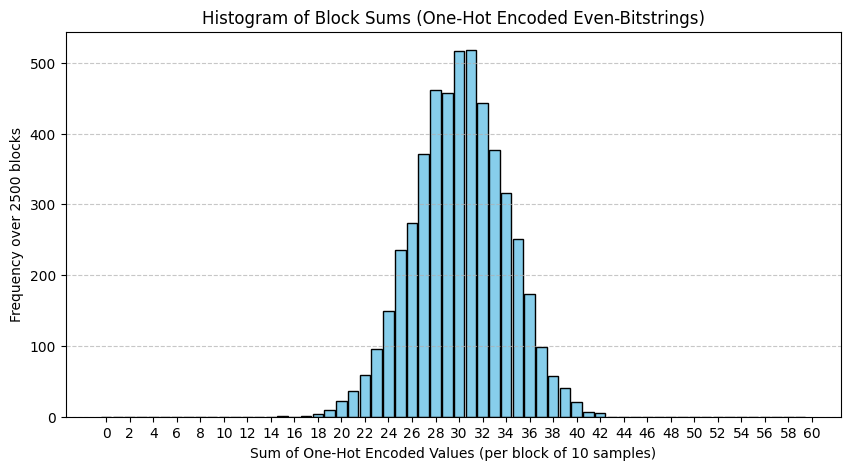

In [14]:
qc = galton_box_shifted(6, HGate(), draw=False)
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=50000, memory=True)
memory_counts = job.result().get_memory()  # to get the list of 20000 bitstrings in order of experiments/shots

block_size = 10  # Block size for summation
even_bitstrings, block_sums, bin_size = post_process_histogram(memory_counts, block_size)

# Block sums histogram
plt.figure(figsize=(10, 5))
plt.hist(block_sums, bins=range(0, bin_size), align='left', rwidth=0.9, color='skyblue', edgecolor='black')
plt.xticks(range(0, bin_size, 2))  # Adjust x-ticks for better readability
plt.xlabel("Sum of One-Hot Encoded Values (per block of {} samples)".format(block_size))
plt.ylabel("Frequency over 2500 blocks")
plt.title("Histogram of Block Sums (One-Hot Encoded Even-Bitstrings)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:

# all the below codes are work in progress for exercise 3


def row_dependent_gate(r):
    p = 0.5 + 0.1* r  # Increasing right probability
    theta = 2 * np.arccos(np.sqrt(p))
    return RYGate(theta)
def quantum_walk_gate(r):
    """Creates a custom rotation gate for quantum walk behavior"""
    angle = np.pi/(r+1)  # Angle decreases with depth
    qc = QuantumCircuit(1, name=f"QW_{r}")
    qc.ry(angle, 0)
    return qc.to_gate()

gate_set= [HGate(), RXGate(2 * np.arccos(np.sqrt(0.2))), row_dependent_gate, quantum_walk_gate]

for gate in gate_set:
    qc = galton_box_shifted(5, gate)
    backend = Aer.get_backend('qasm_simulator')
    compiled = transpile(qc, backend)
    job = backend.run(compiled, shots=1e4)
    counts = job.result().get_counts()
    
    print(f"Gate: {gate.name if hasattr(gate, 'name') else gate}")
    print("Measurement results (bitstrings):")
    for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
        print(f"{bitstring} : {count}")
    
    plot_histogram(counts)
    plt.show()


## Biased Peg

Gate: rx
Measurement results (bitstrings):
00000000001 : 2418
00001000000 : 2111
00000010000 : 1953
00000000100 : 1912
00100000000 : 1324
10000000000 : 282


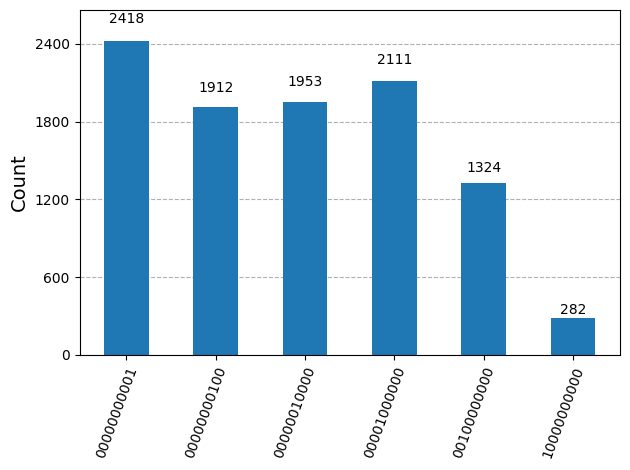

Gate: rx
Measurement results (bitstrings):
00000010000 : 4492
00001000000 : 3358
00000000100 : 1198
00100000000 : 860
10000000000 : 84
00000000001 : 8


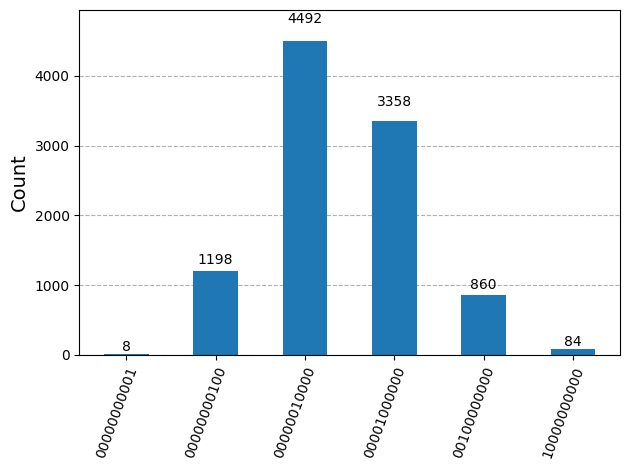

In [68]:
gate_biased= [RXGate(2 * np.pi/3), RXGate(np.pi/3)]

for gate in gate_biased:
    qc = galton_box_shifted(5, gate)
    backend = Aer.get_backend('qasm_simulator')
    compiled = transpile(qc, backend)
    job = backend.run(compiled, shots=1e4)
    counts = job.result().get_counts()
    
    print(f"Gate: {gate.name if hasattr(gate, 'name') else gate}")
    print("Measurement results (bitstrings):")
    for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
        print(f"{bitstring} : {count}")
    
    plot_histogram(counts)
    plt.show()


## Exponential distribution

___
___

## Noise simulations

## Gate count analysis

### Are all measurements required?
